# IRIS classification using Decission Tree






*  Iris is a very popular classification dataset. From the given features of flower we have to classify the plant into three differrnt catagories, namely- Iris setosa, Iris virginica and Iris versicolor. 

.


*  Dataset description- The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species.


.

* Project Objective: 

1. To analyse the dataset.
2. To build and visualize a Decission Tree model.



## By : Joy Das


<img src='./iris-img.png'>

* __Importing Necessary Libraries__

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* Loading the dataset

In [6]:
from sklearn import datasets

In [8]:
data_iris=datasets.load_iris()
X=data_iris.data
y=data_iris.target

* Checking the head of the dataset

In [13]:
# Creating a dataframe of the X nd-array

df_X=pd.DataFrame(data=X,columns=data_iris.feature_names)

In [18]:
# Creating a dataframe of the y nd-array

df_y=pd.DataFrame(data=y,columns=['Species'])

#### For ease of visualizing the data we will create a dataframe containing all the required data

In [16]:
iris=pd.concat([df_X,df_y],axis=1)

In [17]:
#Checking the head of the dataset
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* Dropping the Id Column

In [4]:
iris.drop(labels=['Id'],axis=1,inplace=True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris=iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth',
                         'PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'})

* Basic details of the dataset

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* Checking if null values are present

In [8]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

* Statistical details of the dataset

In [9]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Counting the number of entries per catagory to check if dataset is balanced.

In [10]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

So we can see that the data is balanced properly.

* visual representation of null values

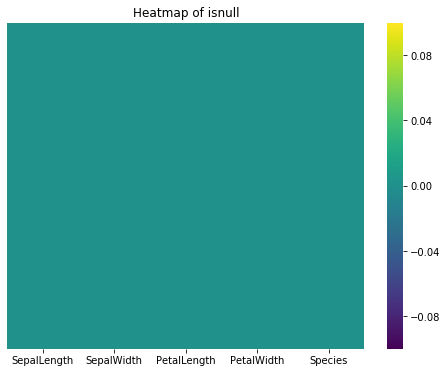

In [11]:
# Checking if null values are present in the dataset

plt.figure(figsize = (8,6))
plt.title("Heatmap of isnull")
sns.heatmap(data = iris.isnull() , yticklabels = False , cmap='viridis')

So we can see that no values are missing

* Gettting the correlation coefficient matrix



In [12]:
iris.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


* Representing correlation matrix with heatmap

(4.0, 0.0)

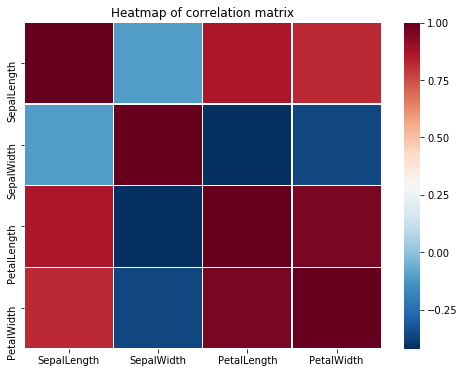

In [13]:
# Plotting the heatmap of the correlation matrix

plt.figure(figsize = (8,6))

plt.title("Heatmap of correlation matrix")

ax = sns.heatmap(data = iris.corr() , cmap='RdBu_r' , lw=.41)

top , bottom = ax.get_ylim()

ax.set_ylim(top+0.5 , bottom-0.5)

* __Performing Exploratory Data Analysis__

Monovariate analysis

In [14]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

* Setting Style of Seaborn plot

In [15]:
sns.set_style(style='whitegrid')

* SepalLength

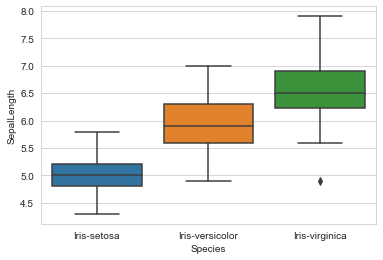

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Species',y='SepalLength',data=iris)
#From this plot we get the mean, quantiles and pdf of the SepalLength for
# three different catagories.

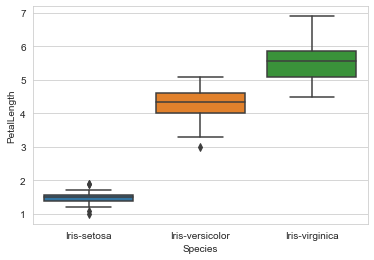

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Species',y='PetalLength',data=iris)
#From this plot we get the mean, quantiles and pdf of the PetalLength for
# three different catagories.

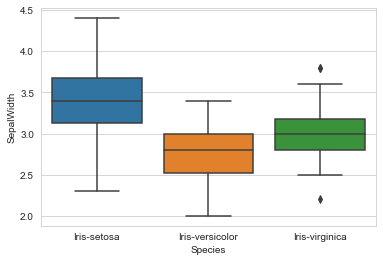

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Species',y='SepalWidth',data=iris)
#From this plot we get the mean, quantiles and pdf of the SepalWidth for
# three different catagories.

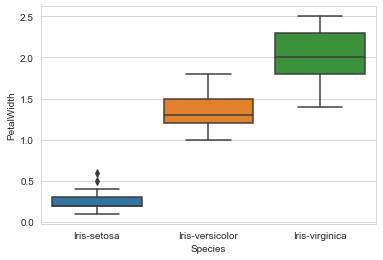

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Species',y='PetalWidth',data=iris)
#From this plot we get the mean, quantiles and pdf of the PetalWidth for
# three different catagories.

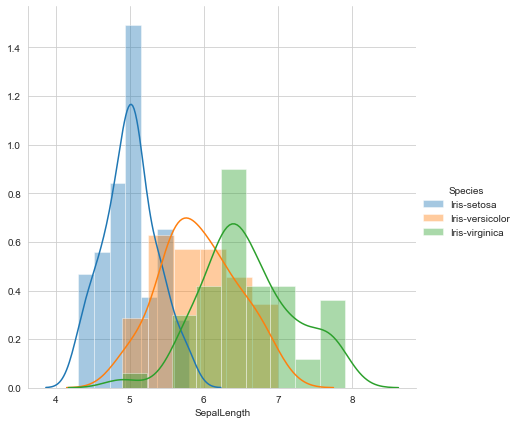

In [20]:
sns.FacetGrid(data=iris,hue='Species',height=6).map(sns.distplot,'SepalLength').add_legend()
plt.show()

# The pdf for three catagories are overlaping much. So this feature is not useful alone.
#But this can be helpful when combined with other features.

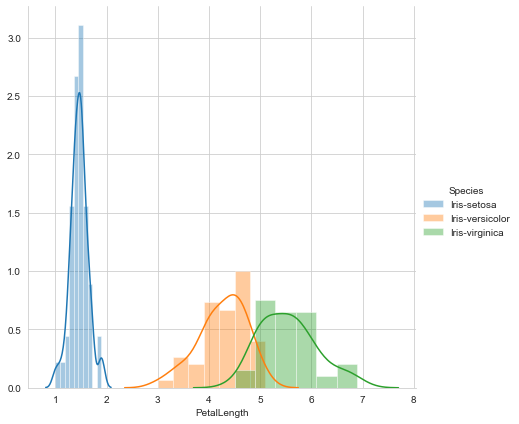

In [21]:
sns.FacetGrid(data=iris,hue='Species',height=6).map(sns.distplot,'PetalLength').add_legend()
plt.show()

# The pdf for three catagories are overlaping much. So this feature is not useful alone.
#But this can be helpful when combined with other features.

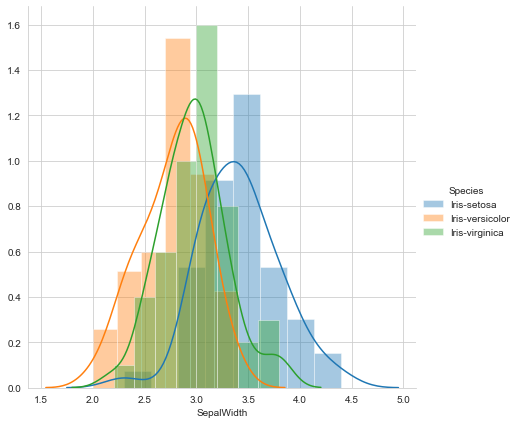

In [22]:
sns.FacetGrid(data=iris,hue='Species',height=6).map(sns.distplot,'SepalWidth').add_legend()
plt.show()

# The pdf for three catagories are overlaping much. So this feature is not useful alone.
#But this can not be that much helpful when combined with other features.

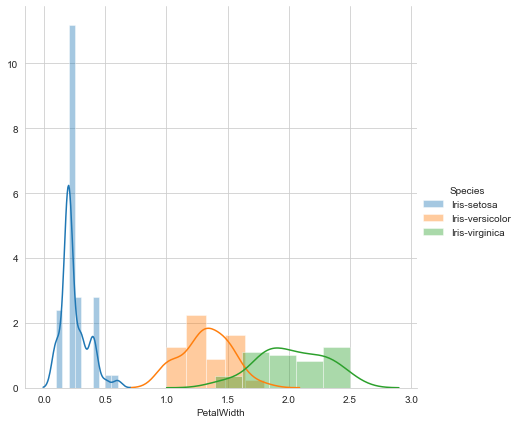

In [23]:
sns.FacetGrid(data=iris,hue='Species',height=6).map(sns.distplot,'PetalWidth').add_legend()
plt.show()


#Here we can see that the pdf of 'Petal_Length' of setosa is completely seperated from rest
#of the classes. But Other two classes are overlaping a little.
#Overall  this featue is very useful for our classification problem.
# Even we can a simple if-else model with preety reasonable accuracy, only based on this feature.

* Bi-variate analysis

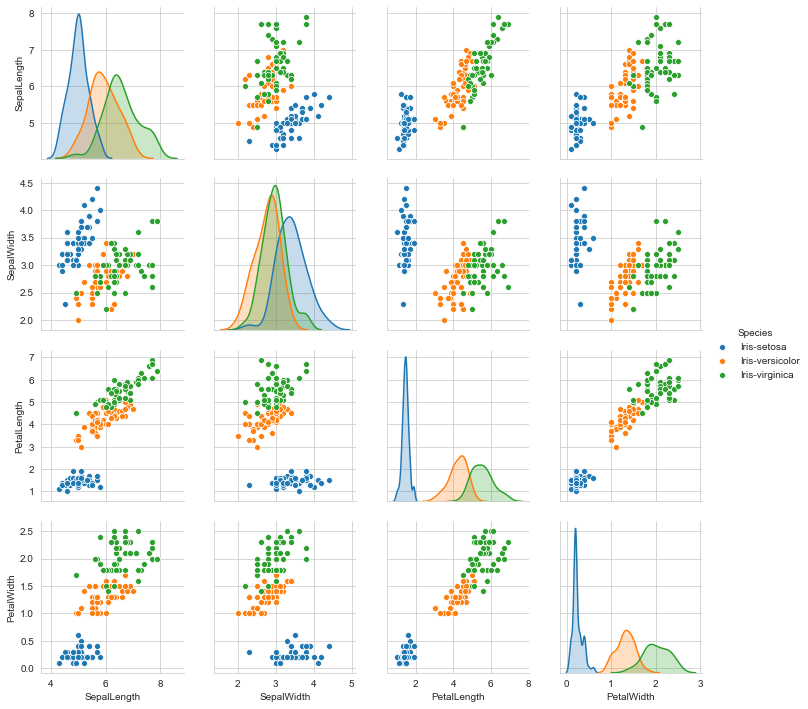

In [24]:
# Plotting a pairplot

sns.pairplot(data=iris,hue='Species')

From the above performed analysis we can see that there are many pair of feature which completely seperates the three catagories of data completely. these pairs are-
* Petal_Length and Sepal_Length
* Petal_Length and Sepal_Width
* Petal_Length and Petal_Width
* Petal_Width and Sepal_Length
* Petal_Width and Sepal_Width

But there is still some overlaping.

* ### Data Pre-processing

We have seen that all our features are useful to the classification job.
So we will use all of them.

* __Splitting the dataset into training and test set__

In [19]:
from sklearn.model_selection import train_test_split

In [42]:
#We will use 65% data for training and rest 35% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* As feature Scaling is not necessary for Decission Tree Algorithm so we will skip it.

* ## __Building model__

* We will build a decission tree model and run Grid Search on it.

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [1 , 2 , 3 , 4 ,5],'min_samples_split':[2,3,4],
                    'min_samples_leaf': [1,2,3]}]

* Using GridSearchCV to find best 'max_depth' parameter for our model.

In [45]:

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters ,scoring = 'accuracy' , cv=5)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_test, y_test))

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
1.0


* ##### So the best set paramers for the model is: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}

* Grid search is complete. Now we will build our final model.

In [46]:
#Instantiating model
tree_model=DecisionTreeClassifier(criterion='gini', max_depth=3 , splitter='best',
                            min_samples_leaf= 1, min_samples_split= 2)

In [47]:
#Training model
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
#Generating prediction
y_pred=tree_model.predict(X_test)

* ### Evaluating performance of the model on the test set.

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
mat=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

In [51]:
print("Confusion_Matrix: ")
print(mat)
print()
print("Performance: ")
print(rep)

Confusion_Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Performance: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



*  So we can see that our model is performing preety well

* ### Visualizing the decission tree

In [52]:
from sklearn import tree

In [53]:
import graphviz

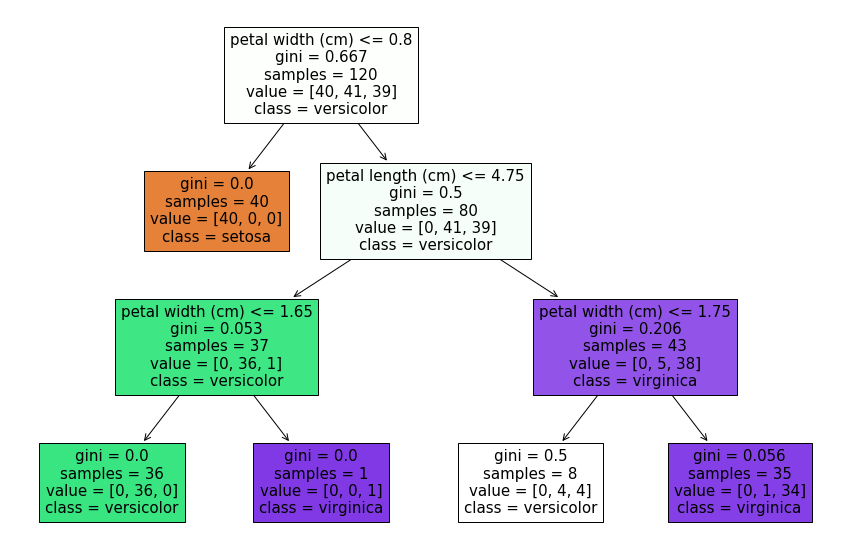

In [60]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_model, 
                   feature_names=data_iris.feature_names,  
                   class_names=data_iris.target_names,
                   filled=True)


* ### So here we can conclude that we have succesfully explored the iris dataset. 

* ### We have also built a Decession tree model to predict the species of the iris flower based on its features.

* ### By performing the Grid-Search we have fine tuned the parameters of the model. we were also able to make the model roboust so that it can perform well with new data. 

# Thank you.